#다층 퍼셉트론으로 mnist


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [6]:
%matplotlib inline

In [7]:
mnist.data[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [8]:
mnist.target[0]

'5'

In [9]:
mnist.target = mnist.target.astype(np.int8)

In [10]:
X = mnist.data / 255
Y = mnist.target

이미지 레이블 5


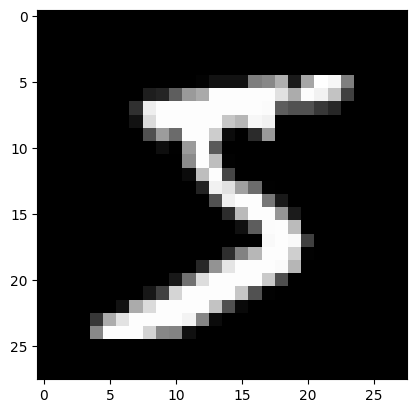

In [11]:
plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("이미지 레이블 {:.0f}".format(Y[0]))

In [12]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
Y_train = torch.LongTensor(Y_train)
Y_test = torch.LongTensor(Y_test)

ds_train = TensorDataset(X_train, Y_train)
ds_test = TensorDataset(X_test, Y_test)

#미니배치 하려고
loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)


In [15]:
from torch import nn

In [16]:
model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [17]:
from torch import optim
#softmax해주는 것
loss_function = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [18]:
def train(epoch):
  model.train() #모델을 학습 모드로 전환

  #학습 시키기. 미니배치 사용
  for data, targets in loader_train:
    optimizer.zero_grad()
    outputs = model(data)
    loss = loss_function(outputs, targets)
    loss.backward()
    optimizer.step()
  print("epoch{}: 완료\n".format(epoch))

In [19]:
def test():
  model.eval()
  correct = 0

  with torch.no_grad():
    for data, targets in loader_test:
      outputs = model(data)

      _, predicted = torch.max(outputs.data, 1)

      correct +=predicted.eq(targets.data.view_as(predicted)).sum()
    data_num = len(loader_test.dataset)  # 데이터 총 건수
    print('\n테스트 데이터에서 예측 정확도: {}/{} ({:.0f}%)\n'.format(correct, data_num, 100. * correct / data_num))

In [20]:
test()


테스트 데이터에서 예측 정확도: 747/10000 (7%)



In [21]:
for epoch in range(3):
  train(epoch)

test()

epoch0: 완료

epoch1: 완료

epoch2: 완료


테스트 데이터에서 예측 정확도: 9498/10000 (95%)



예측 결과 : 2
이 이미지 데이터의 정답 레이블은 2입니다


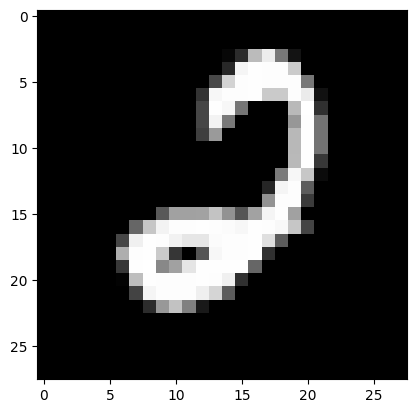

In [24]:
#무작위 예측 결과를 얻어보다
index = 3009
model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("예측 결과 : {}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
print("이 이미지 데이터의 정답 레이블은 {:.0f}입니다".format(Y_test[index]))